0.0015999999999999999 0.0015999999999999999
[[48 48 48 48 48 47 46 45 43 40 34]
 [48 48 48 48 48 47 46 45 43 40 34]
 [48 48 48 48 48 47 46 45 43 40 34]
 [48 48 48 48 48 47 46 45 43 40 34]
 [48 48 48 48 48 47 46 45 43 40 34]
 [47 47 47 47 47 46 45 44 43 40 34]
 [46 46 46 46 46 45 44 43 42 40 34]
 [45 45 45 45 45 44 43 42 41 39 33]
 [43 43 43 43 43 42 42 41 40 39 33]
 [39 39 39 39 39 39 39 39 39 39 33]
 [34 34 34 34 34 34 34 34 34 34 30]]


C:\Users\WARMAC~1\AppData\Local\Temp/ipykernel_3300/218202425.py:32: UserWarning: The following kwargs were not used by contour: 'showtext'
  cp = ax.contourf(X, Y, P, T0, showtext = 'on')


<Figure size 800x400 with 0 Axes>

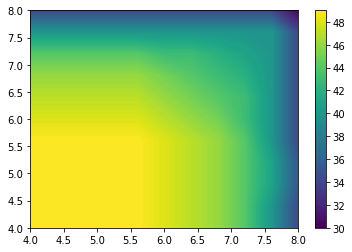

<Figure size 800x400 with 0 Axes>

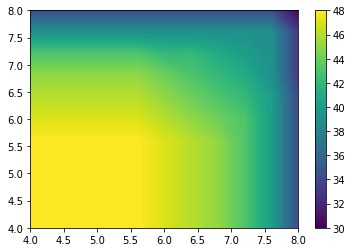

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##################################################
def thomas(l,d,u,b,n):
    g = np.zeros(n)
    h = np.zeros(n)
    sol = np.zeros(n)
    g[0] = d[0]
    h[0] = b[0]
    
    for i in range(1,n):
        g[i] = d[i] - l[i] * u[i-1] / g[i-1]
        h[i] = b[i] - l[i] * h[i-1] / g[i-1]
    
    sol[n-1] = h[n-1] / g[n-1]
    i = n-2
    while i>=0:
        sol[i] = (h[i] - u[i] * sol[i+1]) / g[i]
        i-=1
    return sol
####################################################
#.....Plot
def plot(P,n):
    x = np.linspace(4, 8, n)
    y = np.linspace(4, 8, n)

    plt.figure(figsize = (8, 4), dpi = 100)
    X, Y = np.meshgrid(x,y)
    fig, ax = plt.subplots(1,1)
    cp = ax.contourf(X, Y, P, T0, showtext = 'on')
    fig.colorbar(cp)
    plt.show()
################################################    

a=1.6*10**(-5)
k=61  
xm=4*10**(-2)
ym=4*10^(-2)
x0=0 
y0=0
T0=100
Tinf=25
h=400
tmax=60
nx=10
ny=10
dx=1/nx
dy=1/ny
dt=1
rx = a*dt/(dx**2)
ry = a*dt/(dy**2)

Told = np.array([[T0]*(nx+1)]*(nx+1))
Tnew = Told.copy()

l = np.array([0.0]*(nx+1))
d = l.copy()
u = l.copy()
b = l.copy()
print(rx,ry)
for t in range(tmax):
    l[0] = 0        # a
    d[0] = -1       # b
    u[0] = 1        # c
    b[0] = 0        # d
    l[nx] = -k/(dx*h)
    d[nx] = (k/(dx*h) + 1)
    u[nx] = 0
    b[nx] = Tinf
    for j in range(1,nx):
        for i in range(1,ny):
            l[i] = -rx/2
            d[i] = 1 + rx
            u[i] = -rx/2 
            b[i] = Told[i][j] + (ry/2) * (Told[i][j+1] - 2*Told[i][j] + Told[i][j-1])
        Tnew[j,:] = thomas(l,d,u,b,nx+1)
    Tnew[0,:] = Tnew[1,:]
                    
    Tnew[ny,:] = (np.array([h*Tinf]*(nx+1)) + k/dy * Tnew[ny-1,:]) / (k/dy + h)
    #print(Tnew)
    Told = Tnew.copy()
    
    l[0] = 0
    d[0] = -1
    u[0] = 1
    b[0] = 0
    l[nx] = -k/(dx*h)
    d[nx] = (k/(dx*h) + 1)
    u[nx] = 0
    b[nx] = Tinf
    for j in range(1,nx):
        for i in range(1,ny):
            l[i] = -rx/2
            d[i] = 1 + rx
            u[i] = -rx/2 
            b[i] = Told[i][j] + (ry/2) * (Told[i+1][j] - 2*Told[i][j] + Told[i-1][j])
        Tnew[:,j] = thomas(l,d,u,b,nx+1)
    Tnew[:,0] = Tnew[:,1]
    Tnew[:,ny] = (np.array([h*Tinf]*(nx+1)) + k/dy * Tnew[:,ny-1]) / (k/dy + h)

print(Tnew)
plot(Told,ny+1)
plot(Tnew,ny+1)